In [99]:
from funcs import *

In [100]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"market":"USD","symbol":"BTC","function":"DIGITAL_CURRENCY_DAILY"}

headers = {
	"X-RapidAPI-Key": "157294213dmsh495a015657a6702p1b0087jsn3c1be0fd9b26",
	"X-RapidAPI-Host": "alpha-vantage.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

In [127]:
btc = pd.DataFrame(response.json()["Time Series (Digital Currency Daily)"]).T[["4a. close (USD)"]].astype(float)
btc1 = difference(pd.Series(btc["4a. close (USD)"].values), interval=1)
btc1 = pd.DataFrame(btc1, columns=["4a. close (USD)"])

c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: title={'center': 'Partial Autocorrelation'}>)

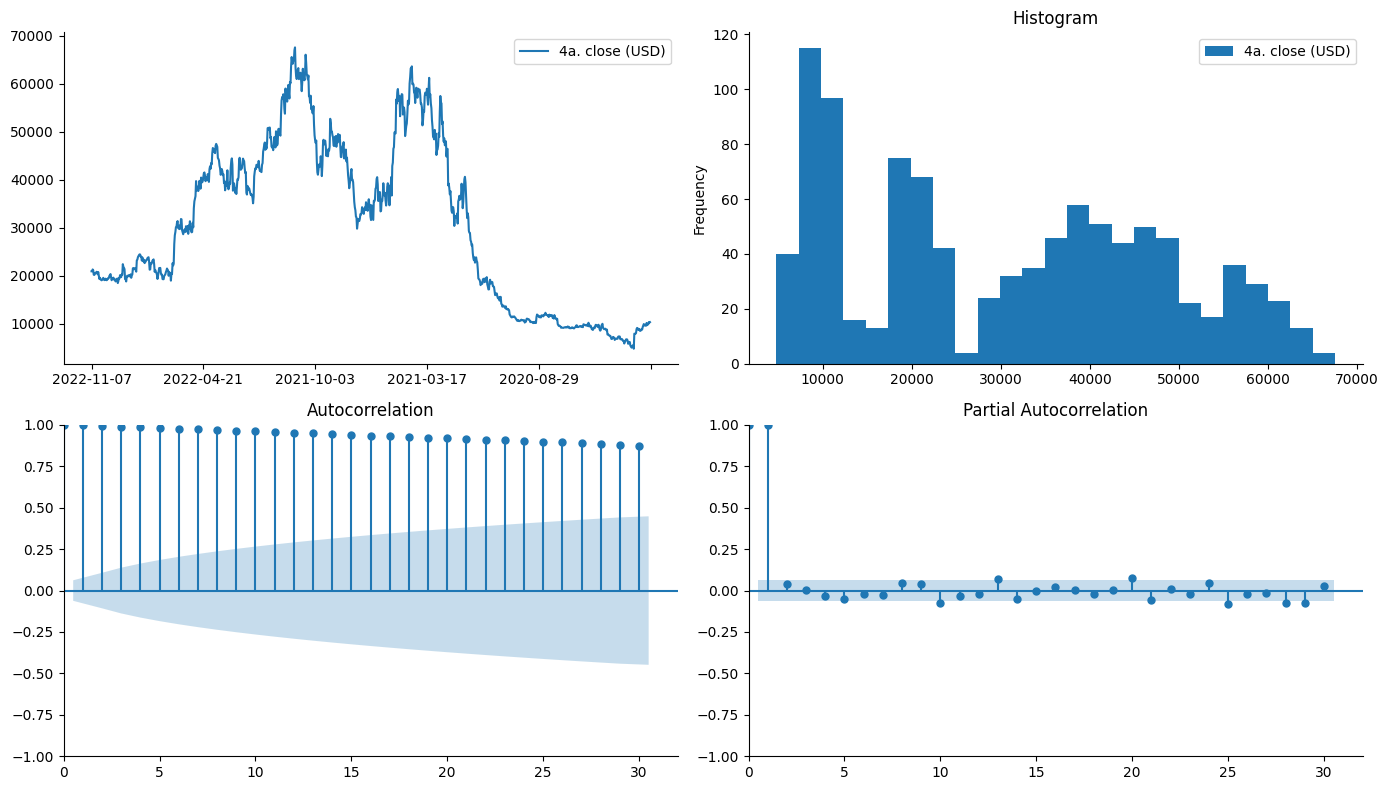

In [120]:
tsplot(btc, lags=30)

# Analysing the First Integer Difference of the Series

ADF Test Results: 
Test Statistic: -32.8364
p-value: 0.0000000000
Critical Values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568


c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: title={'center': 'Partial Autocorrelation'}>)

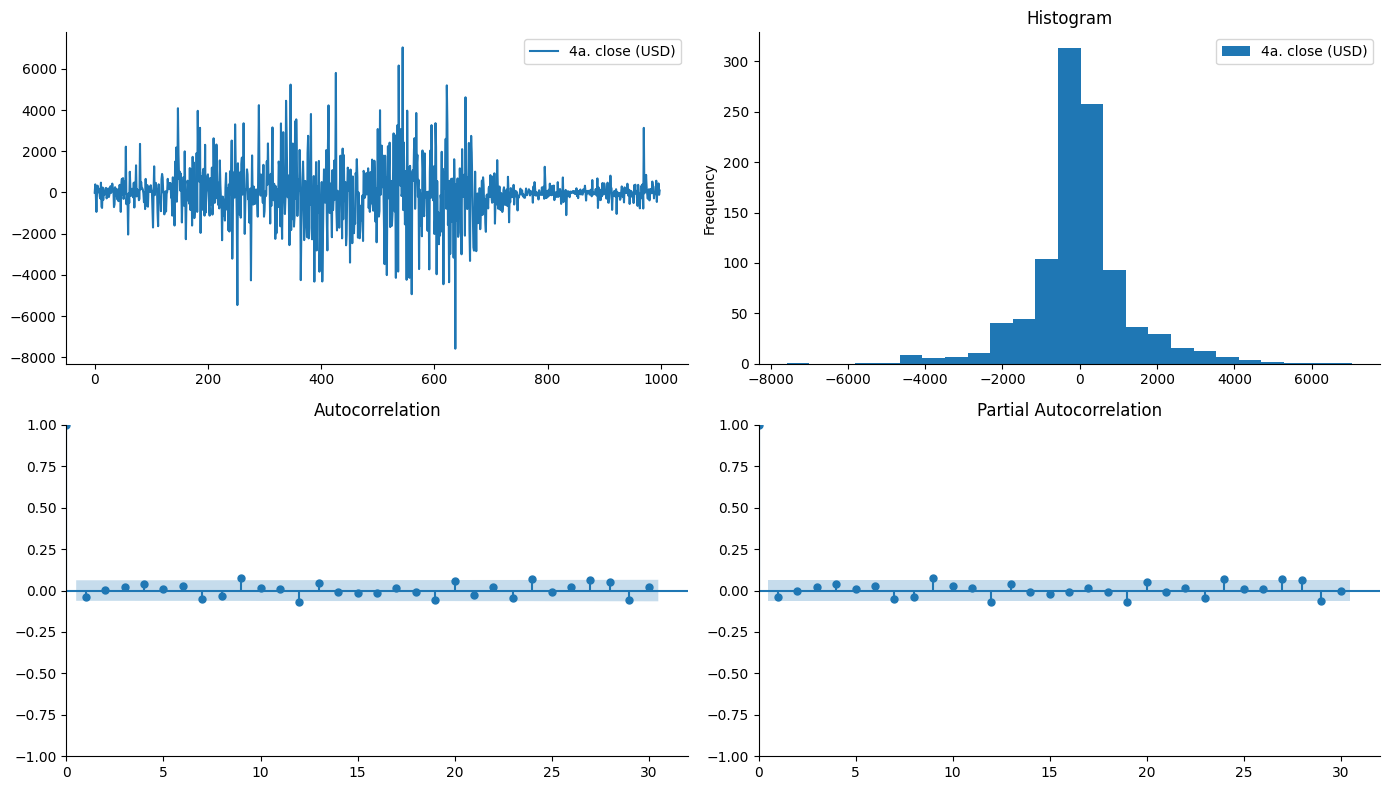

In [132]:
adf(btc1)
tsplot(btc1, lags=30)

# Calculating the Hurst Parameter and the Fractal Difference of the Series

In [129]:
from hurst import compute_Hc
H, c, data = compute_Hc(btc, kind='price', simplified=True)
H

0.8712181093586965

In [130]:
btc_d = fracDiff(btc.astype(float), 2-H, threshold=0.01)
btc_d

c:\Users\vitor\Desktop\Education\LAMFO\Projetos\ml-arfima\funcs.py:96: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_temp = pd.Series()


,4a. close (USD)
2022-11-04,-932.9
2022-11-03,-1674.9
2022-11-02,-671.7
2022-11-01,-348.2
2022-10-31,-739.6
...,...
2020-02-16,-97.4
2020-02-15,-369.7
2020-02-14,89.8
2020-02-13,-517.7


ADF Test Results: 
Test Statistic: -3.0340
p-value: 0.0318400526
Critical Values: 
	1%: -3.437
	5%: -2.865
	10%: -2.568


c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<AxesSubplot: >,
 <AxesSubplot: title={'center': 'Autocorrelation'}>,
 <AxesSubplot: title={'center': 'Partial Autocorrelation'}>)

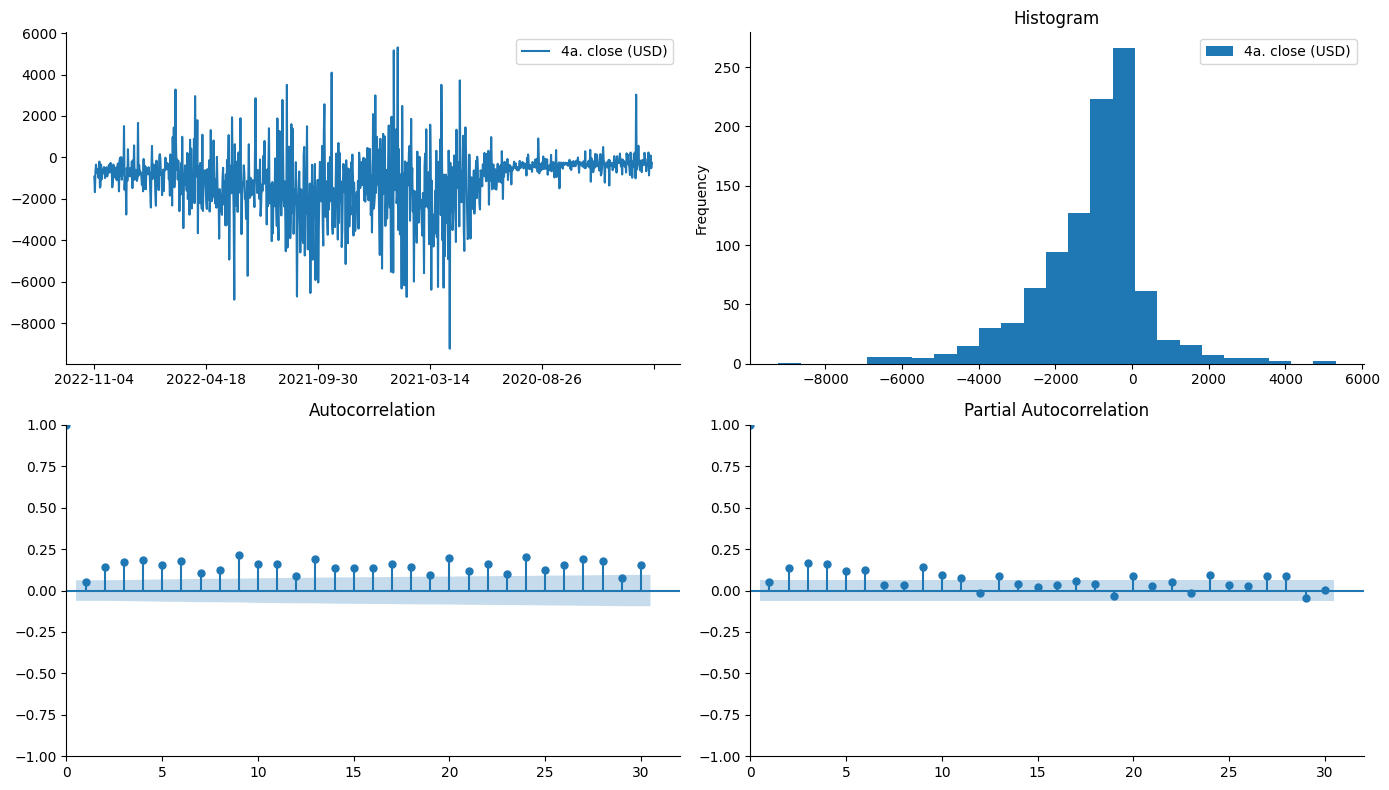

In [133]:
adf(btc_d)
tsplot(btc_d, lags=30)

In [85]:
AIC_BIC_HIQC(btc_d.astype(float))

c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

AIC (4, 3)
BIC (1, 2)
HQIC (1, 2)


c:\Users\vitor\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
